In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import re
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
labels = []
images = []
asanas_name = []
images_path = []
images_pixels = []

i=0
dataset_path = r"dataset"

for directory in os.listdir(dataset_path):
    asanas_name.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)

    i = i+1


In [5]:
print("Total labels: ", len(labels))
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total asanas: ", len(asanas_name))
print("Total images_pixels: ", len(images_pixels))


Total labels:  5991
Total images:  5991
Total images path:  5991
Total asanas:  107
Total images_pixels:  5991


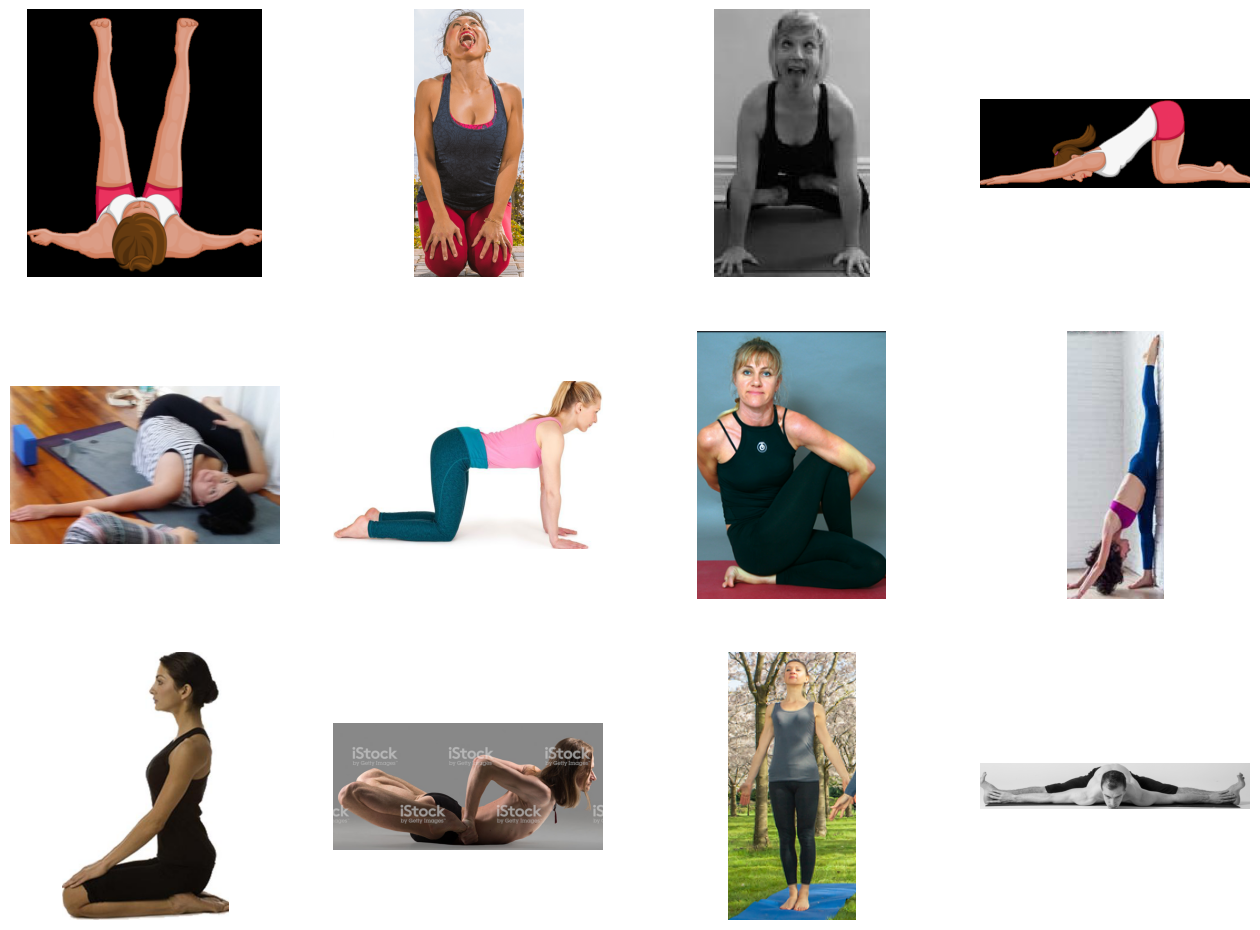

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):

    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)


In [8]:
X_data = np.array(train_data) / 255
Y_data =  to_categorical(labels_data, num_classes = 107)


In [9]:
Y_data[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [10]:
print("X data shape: ", X_data.shape)
print("Y data shape: ", Y_data.shape)

X data shape:  (5991, 100, 100, 3)
Y data shape:  (5991, 107)


In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.4, random_state=101)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))


X train data :  3594
X label data :  2397
Y test data :  3594
Y label data :  2397


In [12]:
datagen = ImageDataGenerator(horizontal_flip=False,
                             vertical_flip=False,
                             rotation_range=0,
                             zoom_range=0.2,
                             width_shift_range=0,
                             height_shift_range=0,
                             shear_range=0,
                             fill_mode="nearest")


In [13]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')
pretrained_model.trainable = False

In [14]:
inputs = pretrained_model.input
drop_layer = tf.keras.layers.Dropout(0.25)(pretrained_model.output)
x_layer = tf.keras.layers.Dense(512, activation='relu')(drop_layer)
x_layer1 = tf.keras.layers.Dense(128, activation='relu')(x_layer)
drop_layer1 = tf.keras.layers.Dropout(0.20)(x_layer1)
outputs = tf.keras.layers.Dense(107, activation='softmax')(drop_layer1)


In [15]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(datagen.flow(X_train,Y_train,batch_size=32),validation_data=(X_val,Y_val),epochs=20)


d:\Projects\Yoga Pose Detection\yoga\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 580ms/step - acc: 0.0157 - loss: 4.8546 - val_acc: 0.0626 - val_loss: 4.4147
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 53s 465ms/step - acc: 0.0558 - loss: 4.3264 - val_acc: 0.1081 - val_loss: 3.8496
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 500ms/step - acc: 0.1242 - loss: 3.8140 - val_acc: 0.1907 - val_loss: 3.3470
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 520ms/step - acc: 0.1815 - loss: 3.4111 - val_acc: 0.2524 - val_loss: 2.9811
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 754ms/step - acc: 0.1981 - loss: 3.1602 - val_acc: 0.2795 - val_loss: 2.8087
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 109s 969ms/step - acc: 0.2627 - loss: 2.8593 - val_acc: 0.2920 - val_loss: 2.7519
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 491ms/step - acc: 0.2691 - loss: 2.7314 - val_acc: 0.3196 - val_loss: 2.5703
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 73s 646ms/step - acc: 0.3409 - loss: 2.4606 - val_acc: 0.3600 - val_loss: 2.4430
Epoch 9/20
113/113 ━━━━━━━━━━━━

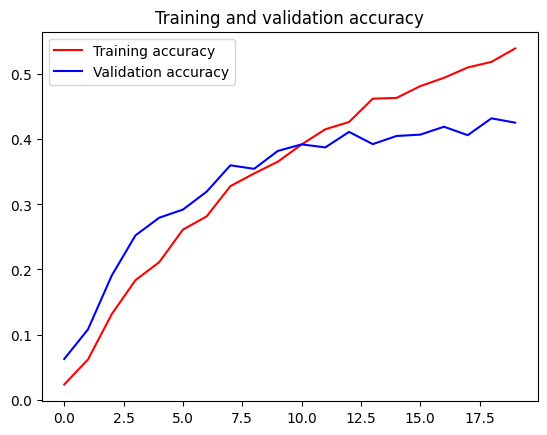

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


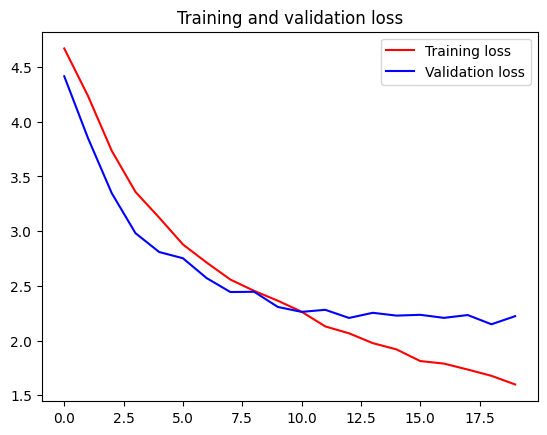

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


In [22]:
# Save the trained model in HDF5 format
model.save(r"yoga_pose_model.h5")
print("Model saved successfully at D:\Projects\Yoga Pose Detection\yoga_pose_model.h5")


Model saved successfully at D:\Projects\Yoga Pose Detection\yoga_pose_model.h5
